<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 3 // Classification</font></h1>

Author: Nurulita Aida R

**Data Set Information:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

**Attribute information:**

For more information, read [Moro et al., 2011].

Input variables:

*Bank client data:*

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

*Related with the last contact of the current campaign:*

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

*Other attributes:*

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

*Output variable (desired target):*

17 - y - has the client subscribed a term deposit? (binary: "yes","no")


### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics

### Data Import and Preparation

In [2]:
df=pd.read_excel('dataset/bank-full-exc.xlsx')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
# checking data shape

df.shape

(45211, 17)

In [5]:
# checking missing data and/or null value

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing data has found. 

In [6]:
# renaming variables

df.rename(columns={'default':'credit', 'contact':'contactType', 'campaign':'totContact', 'previous':'totLastCampaign', 'y':'result'}, inplace=True)

In [7]:
df.head()

,age,job,marital,education,credit,balance,housing,loan,contactType,day,month,duration,totContact,pdays,totLastCampaign,poutcome,result
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45211 non-null  int64 
 1   job              45211 non-null  object
 2   marital          45211 non-null  object
 3   education        45211 non-null  object
 4   credit           45211 non-null  object
 5   balance          45211 non-null  int64 
 6   housing          45211 non-null  object
 7   loan             45211 non-null  object
 8   contactType      45211 non-null  object
 9   day              45211 non-null  int64 
 10  month            45211 non-null  object
 11  duration         45211 non-null  int64 
 12  totContact       45211 non-null  int64 
 13  pdays            45211 non-null  int64 
 14  totLastCampaign  45211 non-null  int64 
 15  poutcome         45211 non-null  object
 16  result           45211 non-null  object
dtypes: int64(7), object(10)
memory 

In [9]:
# converting several variable type into category

columns = ['job', 'marital', 'education', 'credit', 'housing', 'loan', 'contactType', 'day', 'month', 'poutcome', 'result']
for col in columns:
    df[col] = df[col].astype('category')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45211 non-null  int64   
 1   job              45211 non-null  category
 2   marital          45211 non-null  category
 3   education        45211 non-null  category
 4   credit           45211 non-null  category
 5   balance          45211 non-null  int64   
 6   housing          45211 non-null  category
 7   loan             45211 non-null  category
 8   contactType      45211 non-null  category
 9   day              45211 non-null  category
 10  month            45211 non-null  category
 11  duration         45211 non-null  int64   
 12  totContact       45211 non-null  int64   
 13  pdays            45211 non-null  int64   
 14  totLastCampaign  45211 non-null  int64   
 15  poutcome         45211 non-null  category
 16  result           45211 non-null  categor

### Data Exploration

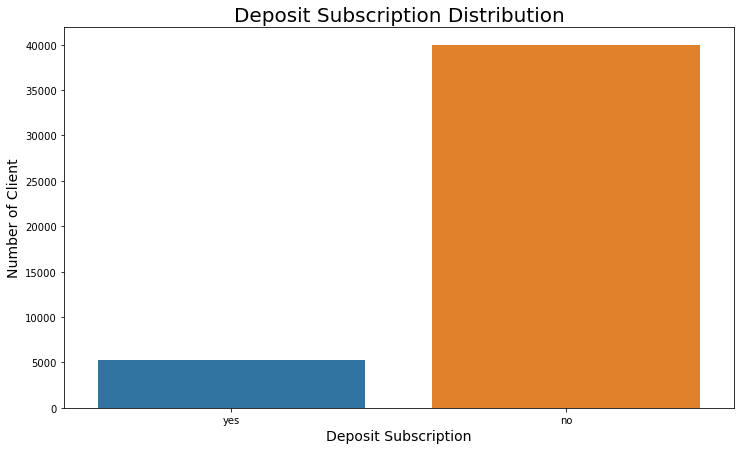

In [11]:
# target variable distribution

plt.figure(figsize=(12,7))
sns.countplot(x='result', 
              data=df, 
              order=['yes',
                    'no'])
plt.xlabel('Deposit Subscription', fontsize=14)
plt.ylabel('Number of Client', fontsize=14)
plt.title('Deposit Subscription Distribution', fontsize=20)
plt.show()

**Insight:**

Only 5000 out of around 40000 clients had the deposit subscription. It means that the data is not equally or normally distributed

C:\Users\Agung Indra Wardana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

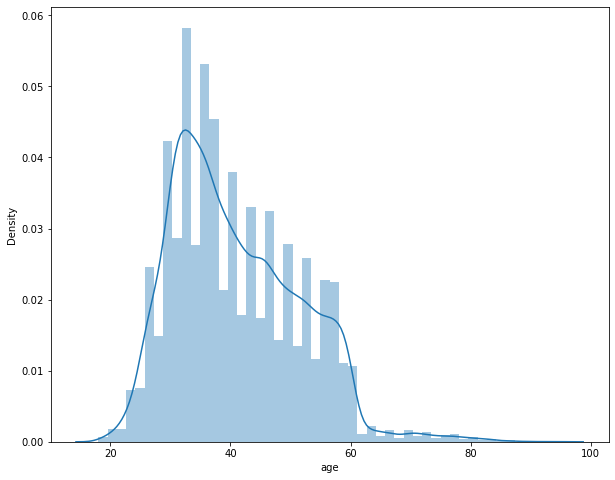

In [12]:
# numerical variables distribution

plt. figure(figsize=(10,8))
sns.distplot(df['age'])

Age is not normally distributed with some outliers above 70 y.o

C:\Users\Agung Indra Wardana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

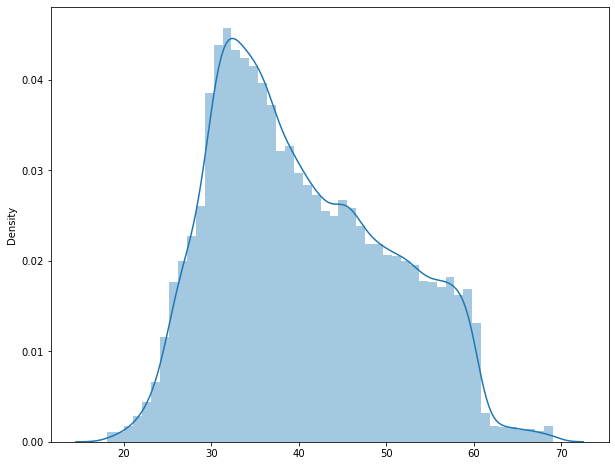

In [13]:
# removing outliers

dfA = df[(df[['age']] < 70)].copy()

plt. figure(figsize=(10,8))
sns.distplot(dfA)

Age outliers removed

C:\Users\Agung Indra Wardana\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totContact', ylabel='Density'>

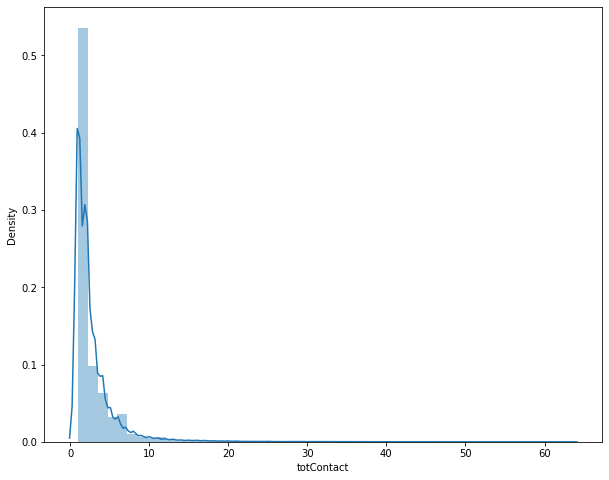

In [14]:
plt. figure(figsize=(10,8))
sns.distplot(df['totContact'])

Total contact on this period lied around between 1 and 10 times 

##### Univariate Analysis of Categorical Variables

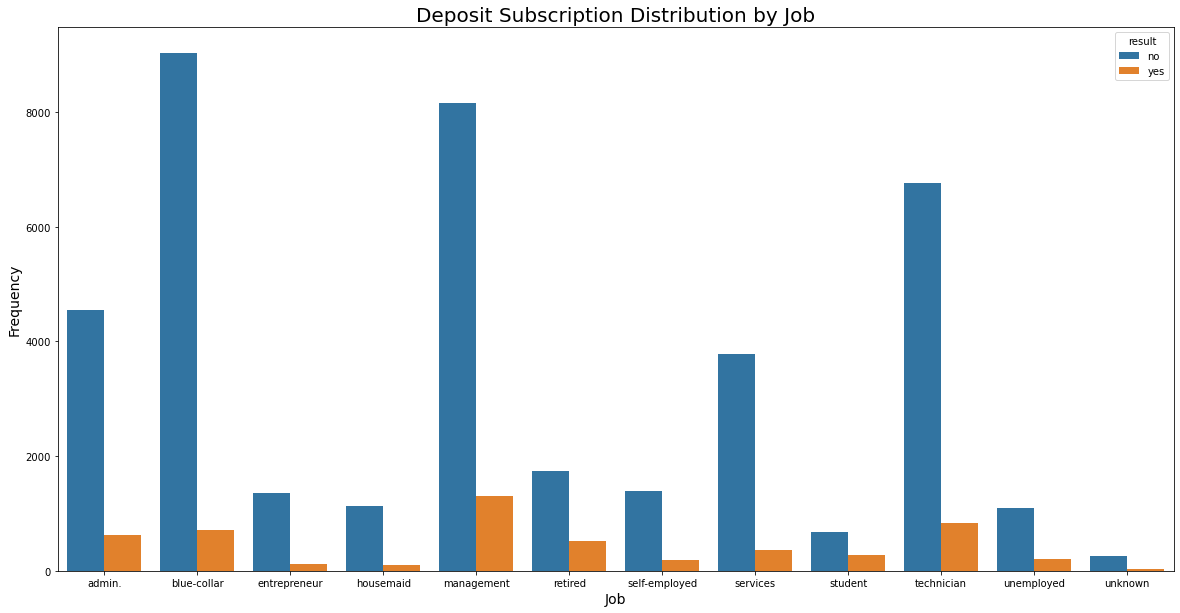

In [15]:
# target distribution based on job
plt.figure(figsize=(20,10))
sns.countplot(x='job',
              hue='result',
              data=df)

plt.xlabel('Job', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Deposit Subscription Distribution by Job', fontsize=20)
plt.show()

**Insight:**

Clients who work in management have the highest rate of term deposit subscription, but also high in terms of not subscribing although the highest of no subscription is blue-colar worker. It is likely that most of the clients were working in management and blue-colar sector 

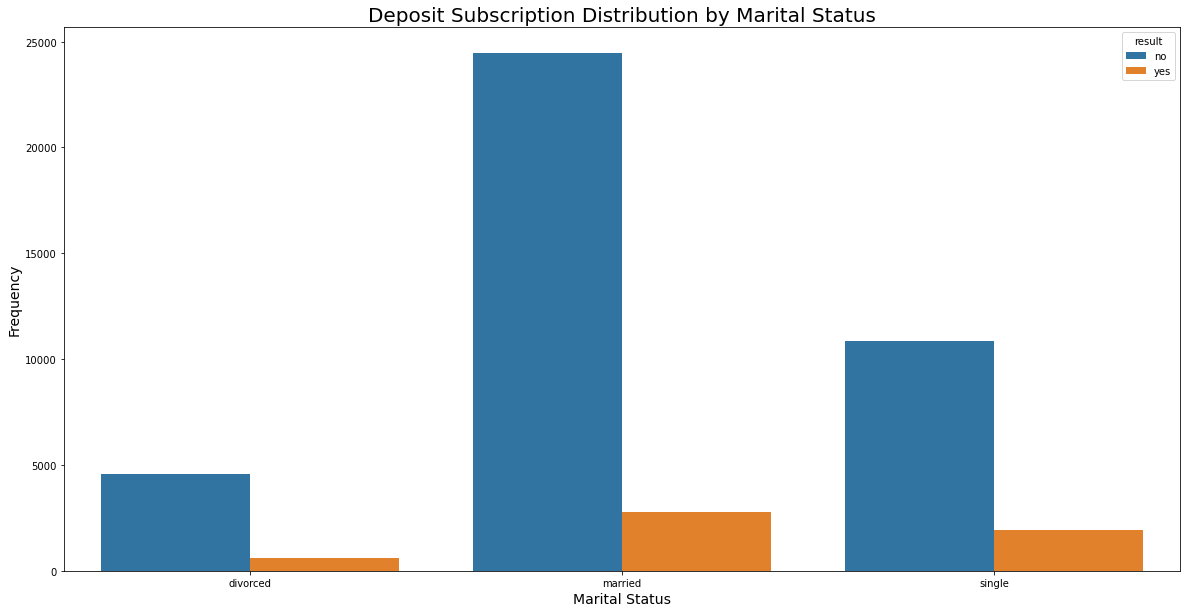

In [16]:
# target distribution based on marital status

plt.figure(figsize=(20,10))
sns.countplot(x='marital',
              hue='result',
              data=df)

plt.xlabel('Marital Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Deposit Subscription Distribution by Marital Status', fontsize=20)
plt.show()

**Insight:**

Majority of the clients are married. It is followed by highest number of subscription in this group

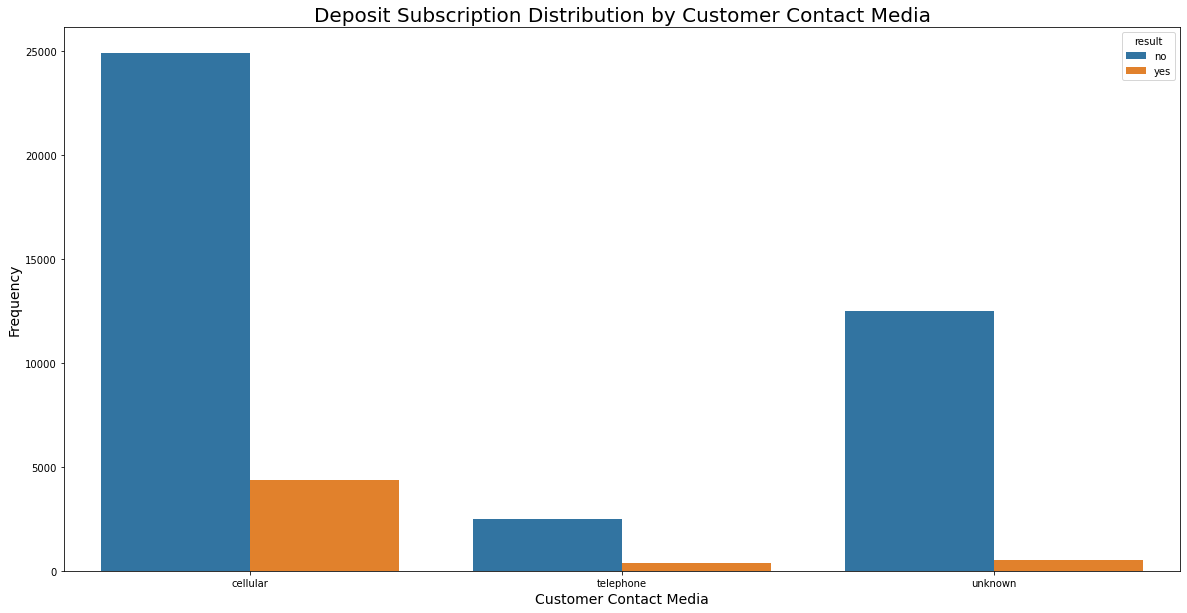

In [17]:
# target distribution based on marital status

plt.figure(figsize=(20,10))
sns.countplot(x='contactType',
              hue='result',
              data=df)

plt.xlabel('Customer Contact Media', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Deposit Subscription Distribution by Customer Contact Media', fontsize=20)
plt.show()

**Insight**:

The contact media don't seem to influence subscription rate

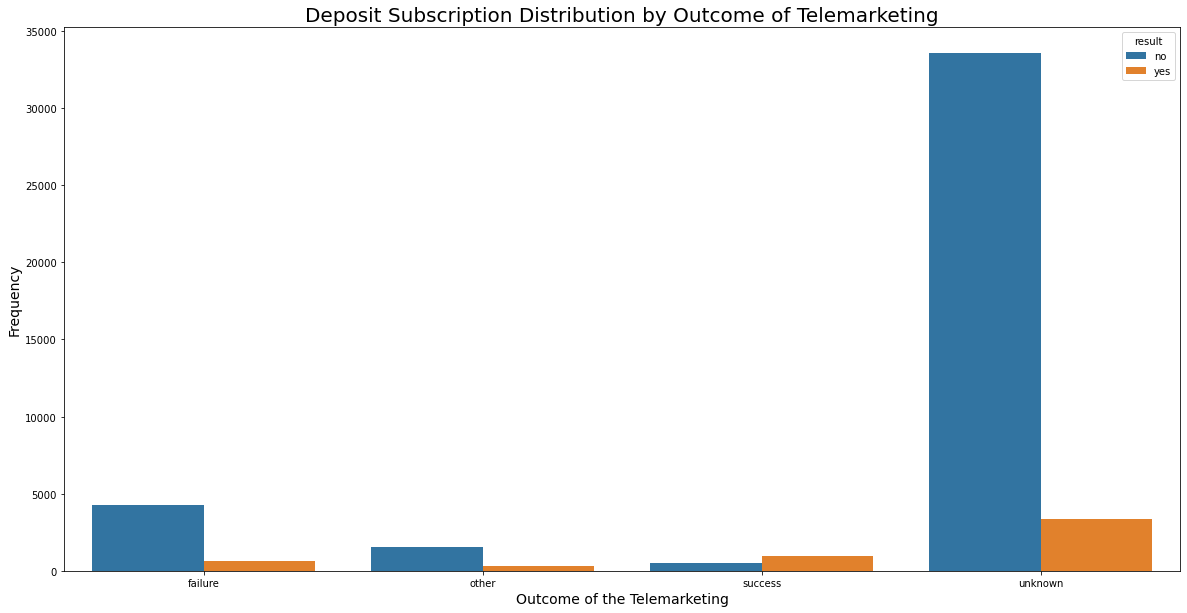

In [18]:
# target distribution based on marital status

plt.figure(figsize=(20,10))
sns.countplot(x='poutcome',
              hue='result',
              data=df)

plt.xlabel('Outcome of the Telemarketing', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Deposit Subscription Distribution by Outcome of Telemarketing', fontsize=20)
plt.show()

**Insight**:

Most of the outcome is unknown. But if we see the subscription rate based on the identified outcome, it shows that the success of telemarketing may played a role in client's subscription

##### Univariate Analysis of Numerical Variables

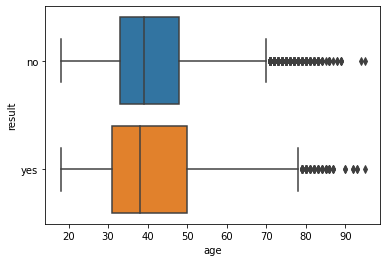

In [19]:
# distribution of result based on age

%matplotlib inline
sns.boxplot(data = df,
           x = 'age',
           y = 'result')
plt.show()

**Insight:**

Both group of term deposit subscription decision are overlapped and have median age of around 38-40. It can be concluded that age is not necessarily influence the subscription decision

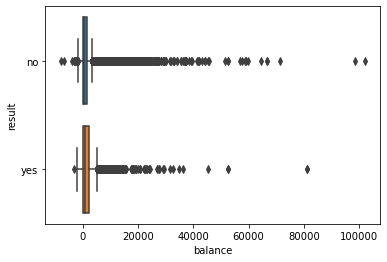

In [20]:
# distribution of result based on balance

%matplotlib inline
sns.boxplot(data = df,
           x = 'balance',
           y = 'result')
plt.show()

**Insight**:

Quite same with the age, bank account balance might not really contributed on the term deposit subscription

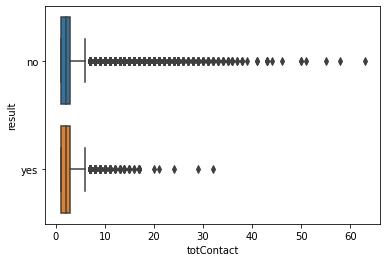

In [21]:
# distribution of result based on total contact made in the canpaign period

%matplotlib inline
sns.boxplot(data = df,
           x = 'totContact',
           y = 'result')
plt.show()

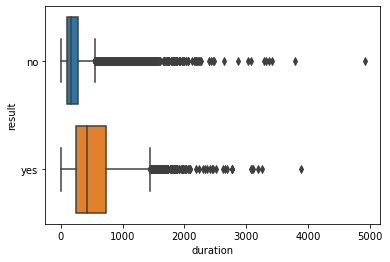

In [22]:
# distribution of result based on contact duration

%matplotlib inline
sns.boxplot(data = df,
           x = 'duration',
           y = 'result')
plt.show()

**Insight:**

From the last two boxplot, we can conclude that duration of the contact can be useful to predict the term deposit subscription compare to total contact made in the period. Client with longer contact duration tend to more making subscription

### Classification Models

In [23]:
# create dummy variable for categorical independent data

data = ['job', 'marital', 'education', 'credit', 'housing', 'loan',
       'contactType', 'day', 'month', 'poutcome']

LE = LabelEncoder()
for col in data:
    df[col] = LE.fit_transform(df[col])

###### Defining train and test data

In [24]:
# create independent and dependent variables dataset

# independent variables
x = df.drop(columns=['result'])

# dependent variable
y = df['result']

In [25]:
# split dataset into training and test set

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=1)

In [26]:
# standardize data

scaler = StandardScaler()
xTrainStandard = scaler.fit_transform(xTrain)

##### Model 1. Logistic Regression

In [27]:
# create Logistic Regression Model

LR = LogisticRegression(solver='liblinear', 
                        C=0.05, 
                        random_state=0)
LR.fit(xTrainStandard, yTrain)

LogisticRegression(C=0.05, random_state=0, solver='liblinear')

In [28]:
xTestStandard = scaler.transform(xTest)

In [29]:
yPred = LR.predict(xTestStandard)

In [30]:
LR.score(xTrainStandard, yTrain)

0.8911429203400006

In [31]:
# checking for model accuracy

print('Accuracy:', LR.score(xTestStandard, yTest))

Accuracy: 0.8912562665880271


###### Confusion Matrix

In [32]:
confusion_matrix(yTest, yPred)

array([[11765,   248],
       [ 1227,   324]], dtype=int64)

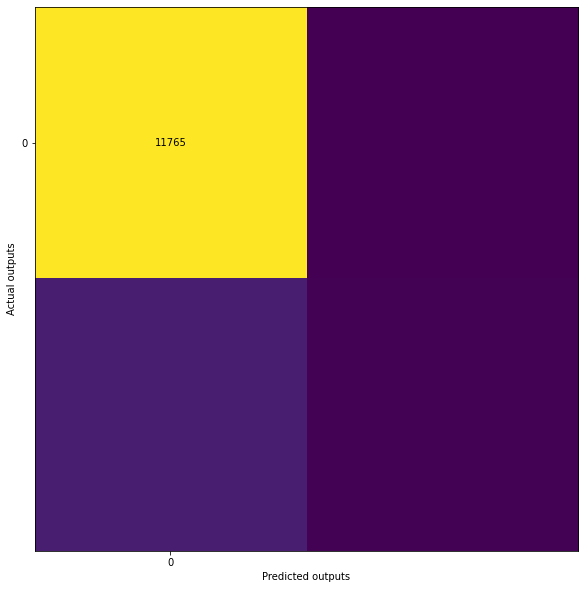

In [33]:
cm = confusion_matrix(yTest, yPred)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(0, 1))
ax.yaxis.set(ticks=range(0, 1))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range (2):
        ax.text(j, i, cm[i,j], ha='center', va='center',
        color='black')

        plt.show()

In [34]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     12013
         yes       0.57      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.74      0.59      0.62     13564
weighted avg       0.87      0.89      0.87     13564



##### Model 2. K-Nearest Neighbors (KNN)

In [35]:
# create KNN model

KNN = KNeighborsClassifier(n_neighbors=6)

KNN.fit(xTrain, yTrain)

yPred = KNN.predict(xTest)

In [36]:
# checking accuracy
print('Accuracy:', metrics.accuracy_score(yTest, yPred))

Accuracy: 0.8883072839870245


In [37]:
# finding best k-value
error = []
for i in range(1,40):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(xTrain, yTrain)
    predi = KNN.predict(xTest)
    error.append(np.mean(predi != yTest))

Text(0, 0.5, 'Error mean')

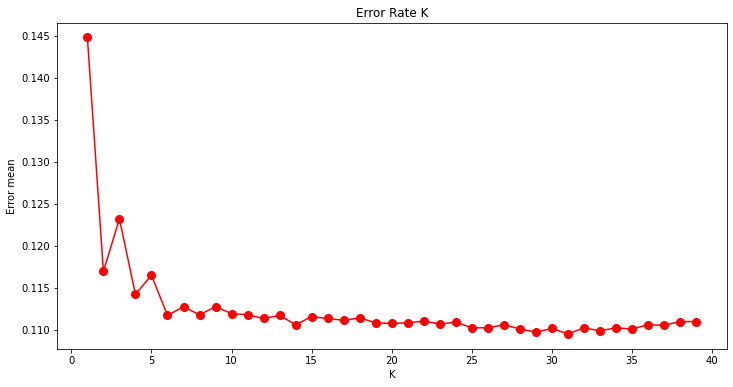

In [38]:
plt.figure(figsize =(12,6))
plt.plot(range(1,40), error, color = 'red', marker = 'o', markersize = 8)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

##### Model 3. Naive Bayes

In [39]:
# create Naive Bayes model

NB = GaussianNB()

NB.fit(xTrain, yTrain)

yPred = NB.predict(xTest)

In [40]:
# checking accuracy
print('Accuracy:', metrics.accuracy_score(yTest, yPred))

Accuracy: 0.841049837805957


##### Model 4. Decision Tree Classifier

In [41]:
# creating Decision Tree Classifier
DTC = DecisionTreeClassifier()

# train Decision Tree Classifier
DTC = DTC.fit(xTrain, yTrain)

# predict response for test dataset
yPred = DTC.predict(xTest)

In [42]:
# checking accuracy
print('Accuracy:', metrics.accuracy_score(yTest, yPred))

Accuracy: 0.8726776762017104


##### Model 5. Random Forest

In [43]:
# create Random Forest Classifier
RFC = RandomForestClassifier(n_estimators=100)

# train model
RFC.fit(xTrain, yTrain)

# predict response
yPred = RFC.predict(xTest)

In [44]:
# checking accuracy
print('Accuracy:', metrics.accuracy_score(yTest, yPred))

Accuracy: 0.9068858743733412


In [45]:
# checking importance value

featureImp = pd.Series(RFC.feature_importances_, index=x.columns).sort_values(ascending=False)

featureImp

duration           0.295669
balance            0.109690
age                0.103434
day                0.090233
month              0.084768
poutcome           0.052370
pdays              0.051329
job                0.048446
totContact         0.037918
education          0.028474
housing            0.025544
marital            0.021918
contactType        0.019810
totLastCampaign    0.018913
loan               0.009769
credit             0.001714
dtype: float64

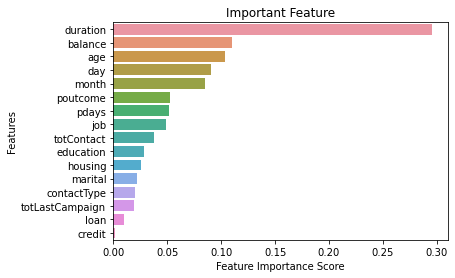

In [46]:
# visualize feature importance

%matplotlib inline

sns.barplot(x = featureImp, y = featureImp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Feature')
plt.show()

##### Model 6. Support Vector Machine (SVM)

In [48]:
SVM = svm.SVC()

# train model
SVM.fit(xTrain, yTrain)

# predict response
yPred = SVM.predict(xTest)

In [49]:
# checking accuracy
print('Accuracy:', metrics.accuracy_score(yTest, yPred))

Accuracy: 0.8855057505160719


##### Final Accuracy Comparison between Models

* Logistic Regression: 0.8912562665880271
* KNN: 0.8883072839870245
* Naive Bayes: 0.841049837805957
* Decision Tree: 0.8742258920672368
* Random Forest: 0.9068858743733412
* SVM: 0.8855057505160719

**Conclusion:**

The best model to be used is the one built with random forest classifier. This model have the highest accuracy compare to others since it can cater this type of datasets with overfitting avoidance. Besides, it also can give insights of the variable importance as basic for further analysis to simplify the prediction